In [13]:
import networkx as nx
import powerlaw as pl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter 

In [14]:
G = nx.read_edgelist('wiki-Vote.txt\Wiki-Vote.txt', create_using=nx.DiGraph)

In [15]:
print(G)
# G.in_degree()

DiGraph with 7115 nodes and 103689 edges


In [16]:
def generate_ccdf_in(G):
   dd = Counter(dict(G.in_degree).values())
   dd = pd.DataFrame(list(dd.items()), columns = ("k", "count")).sort_values(by = "k")
   ccdf = dd.sort_values(by = "k", ascending = False)
   ccdf["cumsum"] = ccdf["count"].cumsum()
   ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
   ccdf = ccdf[["k", "ccdf"]].sort_values(by = "k")

   results = pl.Fit(ccdf["ccdf"])
   k_min = ccdf[ccdf["ccdf"] == results.power_law.xmin]["k"]
   print("Powerlaw CCDF Fit: %1.4f x ^ -%1.4f (k_min = %d)" % (10 ** results.power_law.Kappa, results.power_law.alpha, k_min))

   # Let's plot the best fit.
   ccdf["fit"] = (10 ** results.power_law.Kappa) * (ccdf["k"] ** -results.power_law.alpha)
   ax = plt.gca()
   ccdf.plot(kind = "line", x = "k", y = "ccdf", color = "#e41a1c", loglog = True, ax = ax)
   ccdf.plot(kind = "line", x = "k", y = "fit", color = "#377eb8", loglog = True, ax = ax)
   plt.ylim(bottom=0.0001)
   return None

In [17]:
def logscatter_in(G):
    d = dict(G.in_degree)
    # turn into a count of degree (the values of the dict)
    counter = Counter(d.values())
    # Make it into a dataframe
    counter = pd.DataFrame(list(counter.items()), columns = ("k", "count")).sort_values(by = "k")
    plt.scatter(np.log2(counter['k']), np.log2(counter['count']), c = 'blue', s=10, alpha=0.5)
    plt.title("log-log degree distr.")
    plt.savefig("loglog_degree_distribution.png")
    plt.show()
    return None


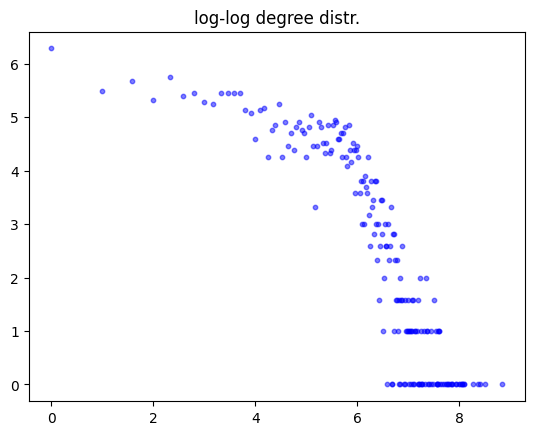

In [18]:
logscatter_in(G)

Calculating best minimal value for power law fit
Powerlaw CCDF Fit: 10.9097 x ^ -4.4276 (k_min = 26)


C:\Users\User\AppData\Local\Temp\ipykernel_23252\3510536466.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Powerlaw CCDF Fit: %1.4f x ^ -%1.4f (k_min = %d)" % (10 ** results.power_law.Kappa, results.power_law.alpha, k_min))


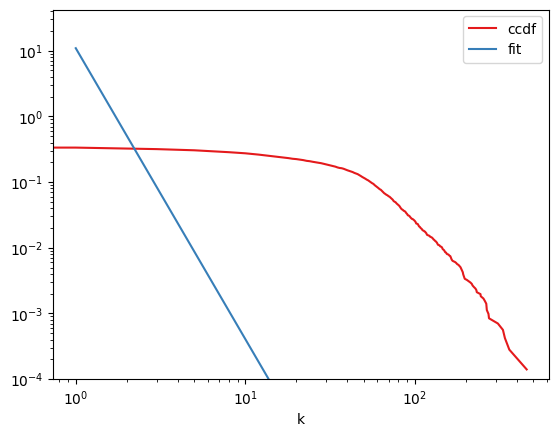

In [19]:
generate_ccdf_in(G)

In [20]:
def generate_ccdf_out(G):
   dd = Counter(dict(G.out_degree).values())
   dd = pd.DataFrame(list(dd.items()), columns = ("k", "count")).sort_values(by = "k")
   ccdf = dd.sort_values(by = "k", ascending = False)
   ccdf["cumsum"] = ccdf["count"].cumsum()
   ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
   ccdf = ccdf[["k", "ccdf"]].sort_values(by = "k")
   
   results = pl.Fit(ccdf["ccdf"])
   k_min = ccdf[ccdf["ccdf"] == results.power_law.xmin]["k"]
   print("Powerlaw CCDF Fit: %1.4f x ^ -%1.4f (k_min = %d)" % (10 ** results.power_law.Kappa, results.power_law.alpha, k_min))

   # Let's plot the best fit.
   ccdf["fit"] = (10 ** results.power_law.Kappa) * (ccdf["k"] ** -results.power_law.alpha)
   ax = plt.gca()
   ccdf.plot(kind = "line", x = "k", y = "ccdf", color = "#e41a1c", loglog = True, ax = ax)
   ccdf.plot(kind = "line", x = "k", y = "fit", color = "#377eb8", loglog = True, ax = ax)
   plt.ylim(bottom=0.0001)
   return None

def logscatter_out(G):
    d = dict(G.out_degree())
    # turn into a count of degree (the values of the dict)
    counter = Counter(d.values())
    # Make it into a dataframe
    counter = pd.DataFrame(list(counter.items()), columns = ("k", "count")).sort_values(by = "k")
    plt.scatter(np.log2(counter['k']), np.log2(counter['count']), c = 'blue', s=10, alpha=0.5)
    plt.title("log-log degree distr.")
    plt.savefig("loglog_degree_distribution.png")
    plt.show()
    return None

Calculating best minimal value for power law fit
Powerlaw CCDF Fit: 10.5675 x ^ -2.7601 (k_min = 28)


C:\Users\User\AppData\Local\Temp\ipykernel_23252\511392278.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Powerlaw CCDF Fit: %1.4f x ^ -%1.4f (k_min = %d)" % (10 ** results.power_law.Kappa, results.power_law.alpha, k_min))


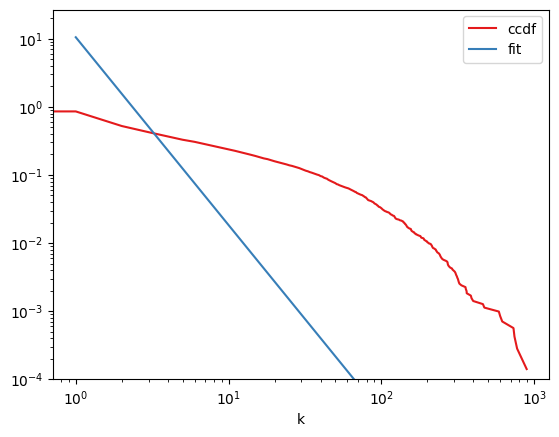

In [21]:
generate_ccdf_out(G)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


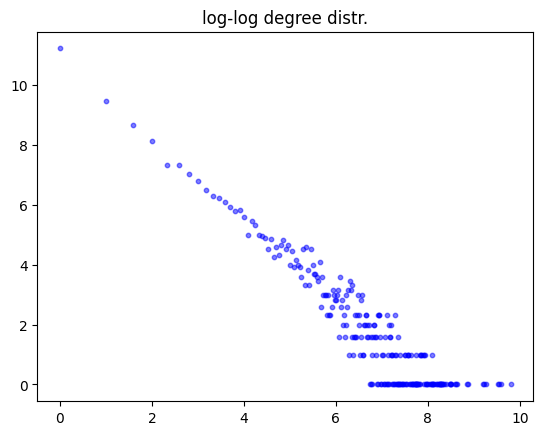

In [22]:
logscatter_out(G)

In [23]:
#Clustering coefficient
cc = nx.transitivity(G)
print(f"CC for real network: {cc}")

CC for real network: 0.05285122817867548


In [24]:
def p(Graph):
    return len(Graph.edges) / ((len(Graph.nodes) * (len(Graph.nodes)-1)) / 2)

print("The parameter p for the graph: ", p(G))

The parameter p for the graph:  0.004097075022161917


In [33]:
#taking the largest strongly connected component
largest_scc = max(nx.strongly_connected_components(G), key=len)

In [34]:
len(largest_scc)

1300

In [35]:
#taking the largest weakly connected component
largest_wcc = max(nx.weakly_connected_components(G), key=len)

In [36]:
len(largest_wcc)

7066

In [37]:
if largest_scc in largest_wcc:
    print(True)

In [39]:
largest_scc.issubset(largest_wcc)

True